In [1]:
# 직접 LSTM 모델 만들기

In [2]:
# 필요한 라이브러리 임포트
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.models import Sequential
from keras.layers import LSTM, Dense
from tensorflow.keras.utils import plot_model

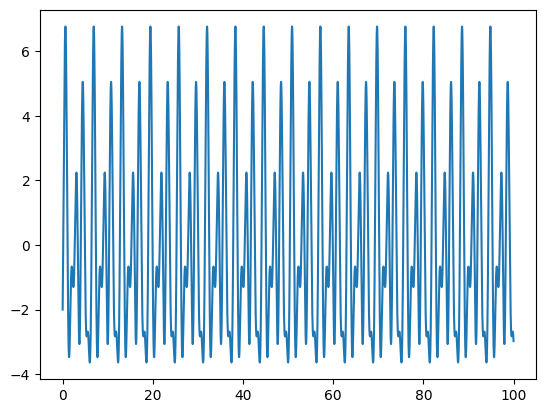

In [12]:

# 데이터 생성
def generate_f_wave(time_steps, num_samples):
    x = np.linspace(0, 100,time_steps * num_samples)
    y = 3*np.sin(3*x) - 2 *+ np.cos(5*x) + 2 * np.sin(2*x)
    return y.reshape(num_samples, time_steps, 1)

time_steps = 50
num_samples = 10000
data = generate_f_wave(time_steps, num_samples)

x = np.linspace(0, 100,time_steps * num_samples)
y = 3*np.sin(3*x) - 2 *+ np.cos(5*x) + 2 * np.sin(2*x)
plt.plot(x,y)
plt.show()

In [13]:
# 데이터 나누기
split = int(0.8 * num_samples)
train_data = data[:split]
test_data = data[split:]
print(len(train_data), len(test_data))

8000 2000


In [15]:
# 모델 구축
# 50개를 넣어서 10개 예측
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(time_steps, 1)))
model.add(Dense(100))
model.add(Dense(10))
model.compile(optimizer="adam", loss="mse")

/Volumes/looparam/#1 Coding/#10 Python/AcademicFestival/AF/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [30]:
x_train = train_data[:,:-10]
y_train = train_data[:,-10:]
model.fit(x_train, y_train, epochs=50, verbose = 1)

250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 4.2214e-04
Epoch 13/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 2.7842e-04
Epoch 14/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 3.1007e-04
Epoch 15/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 2.9692e-04
Epoch 16/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 2.3128e-04
Epoch 17/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 4.9027e-04
Epoch 18/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 2.8546e-04
Epoch 19/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 2.8954e-04
Epoch 20/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 2.3897e-04
Epoch 21/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 6.7185e-04
Epoch 22/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 2.3885e-04
Epoch 23/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 2.2525e-04
Epoch 24/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 2.7546e-04
Epoch 25/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 1

In [38]:
x_test = test_data[:,:-10]
y_test = test_data[:,-10:]
predictions = model.predict(y_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


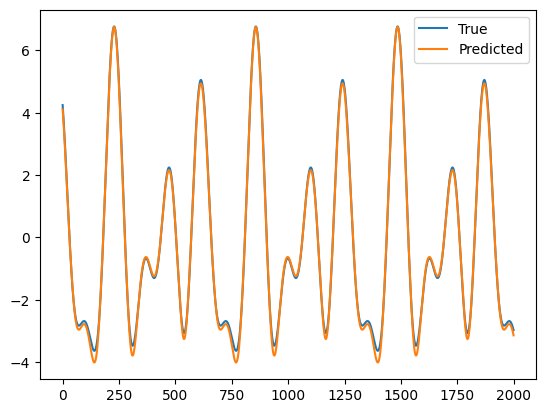

In [50]:
plt.plot(y_test[:, 0, 0], label='True')  # 첫 번째 열을 선택
plt.plot(predictions[:,0], label='Predicted')
plt.legend()
plt.show()

In [41]:
y_test, predictions

(array([[[ 4.24666003],
         [ 4.24467702],
         [ 4.24269195],
         ...,
         [ 4.23273551],
         [ 4.23073803],
         [ 4.22873849]],
 
        [[ 4.1450033 ],
         [ 4.14291871],
         [ 4.14083214],
         ...,
         [ 4.13036952],
         [ 4.12827106],
         [ 4.12617062]],
 
        [[ 4.03837344],
         [ 4.03619162],
         [ 4.0340079 ],
         ...,
         [ 4.0230609 ],
         [ 4.02086582],
         [ 4.01866886]],
 
        ...,
 
        [[-2.91694694],
         [-2.91748325],
         [-2.91802005],
         ...,
         [-2.92071151],
         [-2.92125128],
         [-2.92179154]],
 
        [[-2.94435573],
         [-2.94491593],
         [-2.94547658],
         ...,
         [-2.9482867 ],
         [-2.94885008],
         [-2.94941392]],
 
        [[-2.9729101 ],
         [-2.97349217],
         [-2.97407465],
         ...,
         [-2.97699325],
         [-2.9775782 ],
         [-2.97816357]]]),
 array([[ 4.114334 

In [46]:
print(repr(predictions[0]))

array([4.114334 , 4.198653 , 4.13404  , 4.2966976, 4.2779145, 4.4775605,
       4.4346576, 4.4511166, 4.545781 , 4.5432944], dtype=float32)
